In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
from numpy import loadtxt
import scipy.io as sio
import matplotlib.pyplot as plt
from datetime import datetime, date, time
from xgboost import plot_tree
from sklearn import svm
from sklearn import metrics
import math
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [27]:
import warnings

warnings.filterwarnings('ignore')

In [76]:
cname = ['F43','F42','F34','F32','F31','F29','F24','F21','F13','F6']
t_final = pd.DataFrame()
path2 = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Patients/Grasp/'

for file in os.listdir(path2):
    test_df = pd.read_csv(path2+file, header=None, names=cname)
    file_split = file.split(sep='-')
    file_split2 = file_split[2].split(sep='.')
     
    t_final.loc[i,'mF6'] = test_df['F6'].mean()
    t_final.loc[i,'mF13'] = test_df['F13'].mean()
    t_final.loc[i,'mF21'] = test_df['F21'].mean()
    t_final.loc[i,'mF24'] = test_df['F24'].mean()
    t_final.loc[i,'mF29'] = test_df['F29'].mean()
    t_final.loc[i,'mF31'] = test_df['F31'].mean()
#     t_final.loc[i,'mF32'] = test_df['F32'].mean()
    t_final.loc[i,'mF34'] = test_df['F34'].mean()
    t_final.loc[i,'mF42'] = test_df['F42'].mean()
    t_final.loc[i,'mF43'] = test_df['F43'].mean()

#     t_final.loc[i,'miF6'] = test_df['F6'].min()
#     t_final.loc[i,'miF13'] = test_df['F13'].min()
#     t_final.loc[i,'miF21'] = test_df['F21'].min()
#     t_final.loc[i,'miF24'] = test_df['F24'].min()
#     t_final.loc[i,'miF29'] = test_df['F29'].min()
#     t_final.loc[i,'miF31'] = test_df['F31'].min()
#     t_final.loc[i,'miF32'] = test_df['F32'].min()
#     t_final.loc[i,'miF34'] = test_df['F34'].min()
#     t_final.loc[i,'miF42'] = test_df['F42'].min()
#     t_final.loc[i,'miF43'] = test_df ['F43'].min()
    
#     t_final.loc[i,'sF6'] = test_df['F6'].std()
#     t_final.loc[i,'sF13'] = test_df['F13'].std()
#     t_final.loc[i,'sF21'] = test_df['F21'].std()
#     t_final.loc[i,'sF24'] = test_df['F24'].std()
#     t_final.loc[i,'sF29'] = test_df['F29'].std()
#     t_final.loc[i,'sF31'] = test_df['F31'].std()
# #     t_final.loc[i,'sF32'] = test_df['F32'].std()
#     t_final.loc[i,'sF34'] = test_df['F34'].std()
#     t_final.loc[i,'sF42'] = test_df['F42'].std()
#     t_final.loc[i,'sF43'] = test_df['F43'].std()
    
    t_final.loc[i,'rF6'] = np.sqrt(sum(test_df['F6']**2)/len(test_df))
    t_final.loc[i,'rF13'] = np.sqrt(sum(test_df['F13']**2)/len(test_df))
    t_final.loc[i,'rF21'] = np.sqrt(sum(test_df['F21']**2)/len(test_df))
    t_final.loc[i,'rF24'] = np.sqrt(sum(test_df['F24']**2)/len(test_df))
    t_final.loc[i,'rF29'] = np.sqrt(sum(test_df['F29']**2)/len(test_df))
    t_final.loc[i,'rF31'] = np.sqrt(sum(test_df['F31']**2)/len(test_df))
#     t_final.loc[i,'rF32'] = np.sqrt(sum(test_df['F32']**2)/len(test_df))
    t_final.loc[i,'rF34'] = np.sqrt(sum(test_df['F34']**2)/len(test_df))
    t_final.loc[i,'rF42'] = np.sqrt(sum(test_df['F42']**2)/len(test_df))
    t_final.loc[i,'rF43'] = np.sqrt(sum(test_df['F43']**2)/len(test_df))
    
    t_final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
    i+=1
    
i = 0
final = pd.DataFrame()
path = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Samples/Grasp/'


for file in os.listdir(path):
    df = pd.read_csv(path+file, header=None, names=cname)
    file_split = file.split(sep='-')
    file_split2 = file_split[2].split(sep='.')
     
    final.loc[i,'mF6'] = df['F6'].mean()
    final.loc[i,'mF13'] = df['F13'].mean()
    final.loc[i,'mF21'] = df['F21'].mean()
    final.loc[i,'mF24'] = df['F24'].mean()
    final.loc[i,'mF29'] = df['F29'].mean()
    final.loc[i,'mF31'] = df['F31'].mean()
#     final.loc[i,'mF32'] = df['F32'].mean()
    final.loc[i,'mF34'] = df['F34'].mean()
    final.loc[i,'mF42'] = df['F42'].mean()
    final.loc[i,'mF43'] = df['F43'].mean()

#     final.loc[i,'miF6'] = df['F6'].min()
#     final.loc[i,'miF13'] = df['F13'].min()
#     final.loc[i,'miF21'] = df['F21'].min()
#     final.loc[i,'miF24'] = df['F24'].min()
#     final.loc[i,'miF29'] = df['F29'].min()
#     final.loc[i,'miF31'] = df['F31'].min()
#     final.loc[i,'miF32'] = df['F32'].min()
#     final.loc[i,'miF34'] = df['F34'].min()
#     final.loc[i,'miF42'] = df['F42'].min()
#     final.loc[i,'miF43'] = df ['F43'].min()
    
#     final.loc[i,'sF6'] = df['F6'].std()
#     final.loc[i,'sF13'] = df['F13'].std()
#     final.loc[i,'sF21'] = df['F21'].std()
#     final.loc[i,'sF24'] = df['F24'].std()
#     final.loc[i,'sF29'] = df['F29'].std()
#     final.loc[i,'sF31'] = df['F31'].std()
# #     final.loc[i,'sF32'] = df['F32'].std()
#     final.loc[i,'sF34'] = df['F34'].std()
#     final.loc[i,'sF42'] = df['F42'].std()
#     final.loc[i,'sF43'] = df['F43'].std()
    
    final.loc[i,'rF6'] = np.sqrt(sum(df['F6']**2)/len(df))
    final.loc[i,'rF13'] = np.sqrt(sum(df['F13']**2)/len(df))
    final.loc[i,'rF21'] = np.sqrt(sum(df['F21']**2)/len(df))
    final.loc[i,'rF24'] = np.sqrt(sum(df['F24']**2)/len(df))
    final.loc[i,'rF29'] = np.sqrt(sum(df['F29']**2)/len(df))
    final.loc[i,'rF31'] = np.sqrt(sum(df['F31']**2)/len(df))
#     final.loc[i,'rF32'] = np.sqrt(sum(df['F32']**2)/len(df))
    final.loc[i,'rF34'] = np.sqrt(sum(df['F34']**2)/len(df))
    final.loc[i,'rF42'] = np.sqrt(sum(df['F42']**2)/len(df))
    final.loc[i,'rF43'] = np.sqrt(sum(df['F43']**2)/len(df))
    
    final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
    i+=1
    
    
X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.7)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror"]

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False, early_stopping_rounds=10)
# print('Accuracy of XGB classifier on training set: {:.2f}'
#        .format(xgb_model.score(X_train, y_train)))
# print('Accuracy of XGB classifier on test set: {:.2f}'
#        .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)
final['p'] = xgb_model.predict(X)
# plot_importance(xgb_model)
# pyplot.show()
# print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(xgb_model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

import seaborn as sns

X = final.copy()
X = X.drop(columns=['Label','p'])

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression(max_iter = 200, multi_class='multinomial')
logmodel.fit(X_train,y_train)
clf = LogisticRegression().fit(X_train, y_train)



# print('Accuracy of LR training set: {:.2f}'.format(clf.score(X_train, y_train)))
# print('Accuracy of LR test set: {:.2f}'.format(clf.score(X_test[X_train.columns], y_test)))

y_pred = clf.predict(X_test)
# print(clf.score(X_test,y_test))
# print()
# print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(logmodel, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

x_pat = t_final.drop(columns=['Label'])
t_final['lr_pred'] = clf.predict(x_pat)
t_final['xgb_pred'] = xgb_model.predict(x_pat)
print('patient XGB:',len(t_final[t_final['Label']==t_final['xgb_pred']])/len(t_final))
print('patient LR:',len(t_final[t_final['Label']==t_final['lr_pred']])/len(t_final))

Wall time: 15.9 ms
Accuracy: 82.50% (10.00%)
Accuracy: 77.50% (9.35%)
patient XGB: 0.13333333333333333
patient LR: 0.3333333333333333


In [ ]:
i = 0
cname = ['F43','F42','F34','F32','FSR4','FSR5']
t_final = pd.DataFrame()




In [77]:
i = 0
cname = ['F43','F42','F34','F32','FSR4','FSR5']
final = pd.DataFrame()
t_final = pd.DataFrame()
path = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Samples/Pinch/'
path2 = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Patients/Pinch/'

for file in os.listdir(path2):
    try:
        test_df = pd.DataFrame()
        test_df = pd.read_csv(path2+file, header=None, names=cname)
        file_split = file.split(sep='-')
        file_split2 = file_split[2].split(sep='.')


        t_final.loc[i,'mFSR5'] = test_df['FSR5'].mean()
        t_final.loc[i,'mFSR4'] = test_df['FSR4'].mean()
        t_final.loc[i,'mF32'] = test_df['F32'].mean()
        t_final.loc[i,'mF34'] = test_df['F34'].mean()
        t_final.loc[i,'mF42'] = test_df['F42'].mean()
        t_final.loc[i,'mF43'] = test_df['F43'].mean()

#         t_final.loc[i,'miFSR5'] = test_df['FSR5'].max()
#         t_final.loc[i,'miFSR4'] = test_df['FSR4'].max()


        t_final.loc[i,'miF32'] = test_df['F32'].min()
        t_final.loc[i,'miF34'] = test_df['F34'].min()
        t_final.loc[i,'miF42'] = test_df['F42'].min()
        t_final.loc[i,'miF43'] = test_df ['F43'].min()

#         t_final.loc[i,'sFSR5'] = test_df['FSR5'].std()
#         t_final.loc[i,'sFSR4'] = test_df['FSR4'].std()
#         t_final.loc[i,'sF32'] = test_df['F32'].std()
#         t_final.loc[i,'sF34'] = test_df['F34'].std()
#         t_final.loc[i,'sF42'] = test_df['F42'].std()
#         t_final.loc[i,'sF43'] = test_df['F43'].std()


#         t_final.loc[i,'rFSR5'] = np.sqrt(sum(test_df['FSR5']**2)/len(test_df))
#         t_final.loc[i,'rFSR4'] = np.sqrt(sum(test_df['FSR4']**2)/len(test_df))
#         t_final.loc[i,'rF32'] = np.sqrt(sum(test_df['F32']**2)/len(test_df))
#         t_final.loc[i,'rF34'] = np.sqrt(sum(test_df['F34']**2)/len(test_df))
#         t_final.loc[i,'rF42'] = np.sqrt(sum(test_df['F42']**2)/len(test_df))
#         t_final.loc[i,'rF43'] = np.sqrt(sum(test_df['F43']**2)/len(test_df))

        t_final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
        i+=1
    except:
        print(path2+file)
i=0
for file in os.listdir(path):
    df = pd.DataFrame()
    df = pd.read_csv(path+file, header=None, names=cname)
    file_split = file.split(sep='-')
    file_split2 = file_split[2].split(sep='.')
     
   
    final.loc[i,'mFSR5'] = df['FSR5'].mean()
    final.loc[i,'mFSR4'] = df['FSR4'].mean()
    final.loc[i,'mF32'] = df['F32'].mean()
    final.loc[i,'mF34'] = df['F34'].mean()
    final.loc[i,'mF42'] = df['F42'].mean()
    final.loc[i,'mF43'] = df['F43'].mean()

#     final.loc[i,'miFSR5'] = df['FSR5'].max()
#     final.loc[i,'miFSR4'] = df['FSR4'].max()
    
    
    final.loc[i,'miF32'] = df['F32'].min()
    final.loc[i,'miF34'] = df['F34'].min()
    final.loc[i,'miF42'] = df['F42'].min()
    final.loc[i,'miF43'] = df ['F43'].min()
    
#     final.loc[i,'sFSR5'] = df['FSR5'].std()
#     final.loc[i,'sFSR4'] = df['FSR4'].std()
#     final.loc[i,'sF32'] = df['F32'].std()
#     final.loc[i,'sF34'] = df['F34'].std()
#     final.loc[i,'sF42'] = df['F42'].std()
#     final.loc[i,'sF43'] = df['F43'].std()
    

#     final.loc[i,'rFSR5'] = np.sqrt(sum(df['FSR5']**2)/len(df))
#     final.loc[i,'rFSR4'] = np.sqrt(sum(df['FSR4']**2)/len(df))
#     final.loc[i,'rF32'] = np.sqrt(sum(df['F32']**2)/len(df))
#     final.loc[i,'rF34'] = np.sqrt(sum(df['F34']**2)/len(df))
#     final.loc[i,'rF42'] = np.sqrt(sum(df['F42']**2)/len(df))
#     final.loc[i,'rF43'] = np.sqrt(sum(df['F43']**2)/len(df))
    
    final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
    i+=1
    
    
X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.7)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror"]

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False, early_stopping_rounds=10)
# print('Accuracy of XGB classifier on training set: {:.2f}'
#        .format(xgb_model.score(X_train, y_train)))
# print('Accuracy of XGB classifier on test set: {:.2f}'
#        .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)
final['p'] = xgb_model.predict(X)
#plot_importance(xgb_model)
#pyplot.show()
#print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(xgb_model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

import seaborn as sns

X = final.copy()
X = final.drop(columns=['Label','p']).copy()

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression(max_iter = 200, multi_class='multinomial')
logmodel.fit(X_train,y_train)
clf = LogisticRegression().fit(X_train, y_train)



#print('Accuracy of training set: {:.2f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of test set: {:.2f}'.format(clf.score(X_test[X_train.columns], y_test)))

y_pred = clf.predict(X_test)
#print(clf.score(X_test,y_test))
# print()
#print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(logmodel, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

t_final[t_final.columns] = t_final[t_final.columns].apply(pd.to_numeric)
x_pat = t_final.drop(columns=['Label'])
t_final['lr_pred'] = clf.predict(x_pat)
t_final['xgb_pred'] = xgb_model.predict(x_pat)
print('patient XGB:',len(t_final[t_final['Label']==t_final['xgb_pred']])/len(t_final))
print('patient LR:',len(t_final[t_final['Label']==t_final['lr_pred']])/len(t_final))

Wall time: 9.84 ms
Accuracy: 75.00% (0.00%)
Accuracy: 70.00% (12.75%)
patient XGB: 0.8
patient LR: 0.6


In [69]:
i = 0
cname = ['Ax','Ay','Az','Gx','Gy','Gz']
final = pd.DataFrame()
t_final = pd.DataFrame()
path = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Samples/Wave/'
path2 = 'C:/Users/Husse/Desktop/iGraspProject/Hardware/Patients/Wave/'

for file in os.listdir(path2):
    test_df = pd.DataFrame()
    test_df = pd.read_csv(path2+file, header=None, names=cname)
    file_split = file.split(sep='-')
    file_split2 = file_split[2].split(sep='.')
    
    test_df['aAx'] = test_df['Ax'].abs()
    test_df['aAy'] = test_df['Ay'].abs()
    test_df['aAz'] = test_df['Az'].abs()
    test_df['aGx'] = test_df['Gx'].abs()
    test_df['aGy'] = test_df['Gy'].abs()
    test_df['aGz'] = test_df['Gz'].abs()
   
    t_final.loc[i,'mAx'] = test_df['Ax'].mean()
    t_final.loc[i,'mAy'] = test_df['Ay'].mean()
    t_final.loc[i,'mAz'] = test_df['Az'].mean()
    t_final.loc[i,'mGx'] = test_df['Gx'].mean()
    t_final.loc[i,'mGy'] = test_df['Gy'].mean()
    t_final.loc[i,'mGz'] = test_df['Gz'].mean()
    
#     t_final.loc[i,'sAx'] = test_df['Ax'].std()
#     t_final.loc[i,'sAy'] = test_df['Ay'].std()
#     t_final.loc[i,'sAz'] = test_df['Az'].std()
#     t_final.loc[i,'sGx'] = test_df['Gx'].std()
#     t_final.loc[i,'sGy'] = test_df['Gy'].std()
#     t_final.loc[i,'sGz'] = test_df['Gz'].std()

#     t_final.loc[i,'rAx'] = np.sqrt(sum(test_df['Ax']**2)/len(test_df))
#     t_final.loc[i,'rAy'] = np.sqrt(sum(test_df['Ay']**2)/len(test_df))
#     t_final.loc[i,'rAz'] = np.sqrt(sum(test_df['Az']**2)/len(test_df))
#     t_final.loc[i,'rGx'] = np.sqrt(sum(test_df['Gx']**2)/len(test_df))
#     t_final.loc[i,'rGy'] = np.sqrt(sum(test_df['Gy']**2)/len(test_df))
#     t_final.loc[i,'rGz'] = np.sqrt(sum(test_df['Gz']**2)/len(test_df))
    
    t_final.loc[i,'SMAac'] = (test_df['Ax'].sum()+test_df['Ay'].sum()+test_df['Az'].sum())*(1/5)
    t_final.loc[i,'SMAgy'] = (test_df['Gx'].sum()+test_df['Gy'].sum()+test_df['Gz'].sum())*(1/5)
    
    t_final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
    i+=1

    

for file in os.listdir(path):
    df = pd.DataFrame()
    df = pd.read_csv(path+file, header=None, names=cname)
    file_split = file.split(sep='-')
    file_split2 = file_split[2].split(sep='.')
    
    df['aAx'] = df['Ax'].abs()
    df['aAy'] = df['Ay'].abs()
    df['aAz'] = df['Az'].abs()
    df['aGx'] = df['Gx'].abs()
    df['aGy'] = df['Gy'].abs()
    df['aGz'] = df['Gz'].abs()
   
    final.loc[i,'mAx'] = df['Ax'].mean()
    final.loc[i,'mAy'] = df['Ay'].mean()
    final.loc[i,'mAz'] = df['Az'].mean()
    final.loc[i,'mGx'] = df['Gx'].mean()
    final.loc[i,'mGy'] = df['Gy'].mean()
    final.loc[i,'mGz'] = df['Gz'].mean()
    
#     final.loc[i,'sAx'] = df['Ax'].std()
#     final.loc[i,'sAy'] = df['Ay'].std()
#     final.loc[i,'sAz'] = df['Az'].std()
#     final.loc[i,'sGx'] = df['Gx'].std()
#     final.loc[i,'sGy'] = df['Gy'].std()
#     final.loc[i,'sGz'] = df['Gz'].std()

#     final.loc[i,'rAx'] = np.sqrt(sum(df['Ax']**2)/len(df))
#     final.loc[i,'rAy'] = np.sqrt(sum(df['Ay']**2)/len(df))
#     final.loc[i,'rAz'] = np.sqrt(sum(df['Az']**2)/len(df))
#     final.loc[i,'rGx'] = np.sqrt(sum(df['Gx']**2)/len(df))
#     final.loc[i,'rGy'] = np.sqrt(sum(df['Gy']**2)/len(df))
#     final.loc[i,'rGz'] = np.sqrt(sum(df['Gz']**2)/len(df))
    
    final.loc[i,'SMAac'] = (df['Ax'].sum()+df['Ay'].sum()+df['Az'].sum())*(1/5)
    final.loc[i,'SMAgy'] = (df['Gx'].sum()+df['Gy'].sum()+df['Gz'].sum())*(1/5)
    
    final.loc[i,'Label'] = math.floor(int(file_split2[0])/10)
    i+=1

    
X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.7)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror"]

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False, early_stopping_rounds=10)
# print('Accuracy of XGB classifier on training set: {:.2f}'
#        .format(xgb_model.score(X_train, y_train)))
# print('Accuracy of XGB classifier on test set: {:.2f}'
#        .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)
final['p'] = xgb_model.predict(X)
# plot_importance(xgb_model)
# pyplot.show()
# print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(xgb_model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

import seaborn as sns

X = final.drop(columns=['Label','p']).copy()


y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression(max_iter = 200, multi_class='multinomial')
logmodel.fit(X_train,y_train)
clf = LogisticRegression().fit(X_train, y_train)



# print('Accuracy of training set: {:.2f}'.format(clf.score(X_train, y_train)))
# print('Accuracy of test set: {:.2f}'.format(clf.score(X_test[X_train.columns], y_test)))

y_pred = clf.predict(X_test)
#print(clf.score(X_test,y_test))
#print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(logmodel, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

t_final[t_final.columns] = t_final[t_final.columns].apply(pd.to_numeric)
x_pat = t_final.drop(columns=['Label'])
t_final['lr_pred'] = clf.predict(x_pat)
t_final['xgb_pred'] = xgb_model.predict(x_pat)
print('patient XGB:',len(t_final[t_final['Label']==t_final['xgb_pred']])/len(t_final))
print('patient LR:',len(t_final[t_final['Label']==t_final['lr_pred']])/len(t_final))

Wall time: 12.9 ms
Accuracy: 67.50% (23.18%)
Accuracy: 80.00% (16.96%)
patient XGB: 0.5
patient LR: 0.1


Wall time: 58.9 ms
Accuracy of XGB classifier on training set: 0.96
Accuracy of XGB classifier on test set: 1.00


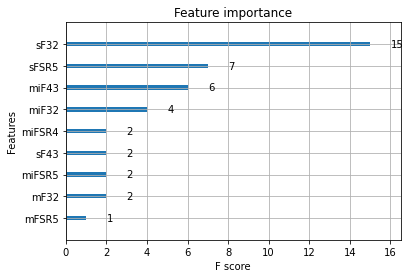

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Accuracy: 85.71% (9.04%)


In [303]:
X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.7)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["merror"]

%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False, early_stopping_rounds=10)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)
final['p'] = xgb_model.predict(X)
plot_importance(xgb_model)
pyplot.show()
print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(xgb_model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [301]:
import seaborn as sns

X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logmodel = LogisticRegression(max_iter = 100, multi_class='multinomial')
logmodel.fit(X_train,y_train)
clf = LogisticRegression().fit(X_train, y_train)



print('Accuracy of training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of test set: {:.2f}'.format(clf.score(X_test[X_train.columns], y_test)))

y_pred = clf.predict(X_test)
print(clf.score(X_test,y_test))
# print()
print(classification_report(y_test, y_pred))
kfold = StratifiedKFold(n_splits=5, random_state=None)
results = cross_val_score(logmodel, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# class_names=[0,1,2] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# # create heatmap
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')

c:\users\husse\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\husse\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Accuracy of training set: 1.00
Accuracy of test set: 0.73
0.7272727272727273
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       0.67      0.50      0.57         4
         2.0       0.80      0.80      0.80         5

    accuracy                           0.73        11
   macro avg       0.71      0.77      0.72        11
weighted avg       0.73      0.73      0.72        11

Accuracy: 91.43% (11.43%)


c:\users\husse\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [78]:
X = final.copy()
del X['Label']

y = final['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [79]:
X.head()

,mFSR5,mFSR4,mF32,mF34,mF42,mF43,miFSR5,miFSR4,miF32,miF34,...,sF34,sF42,sF43,rFSR5,rFSR4,rF32,rF34,rF42,rF43,p
0,0.901408,6.957746,-9.464789,7901.070423,13888.619718,-1858.704225,197.0,550.0,-308.0,7616.0,...,109.846558,78.440945,85.925615,54.007563,172.046423,126.269888,7901.823216,13888.838108,1860.661339,0.0
1,114.361111,8.458333,49.708333,7880.166667,13843.722222,-2097.111111,4490.0,1081.0,-92.0,7716.0,...,82.802837,61.318201,55.022545,714.302554,134.678063,385.059898,7880.595649,13843.856134,2097.822787,0.0
2,215.632353,-295.750000,233.573529,6582.058824,14532.411765,-1538.941176,3371.0,3176.0,-8953.0,576.0,...,1764.960918,989.922750,890.138776,1254.215756,2778.555425,2101.039081,6811.224214,14565.593972,1774.552006,0.0
3,124.750000,22.416667,41.777778,8384.555556,13088.555556,-3305.444444,4496.0,1260.0,-408.0,8088.0,...,86.747308,71.074824,59.784799,738.065377,177.023382,419.590707,8384.998059,13088.745853,3305.977549,0.0
4,118.369863,13.931507,52.876712,8470.684932,12995.506849,-3418.575342,4496.0,1183.0,-130.0,8316.0,...,73.837825,60.889500,64.568206,727.668890,144.278602,399.129189,8471.002334,12995.647541,3419.176701,0.0


In [10]:
from sklearn.cluster import MeanShift

X = final.copy()
del X['Label']

y = final['Label'].copy().to_frame()

y_pred = MeanShift().fit_predict(X)
y['cluster'] = list(y_pred)
y['count']=1
y.groupby(['cluster','Label'])['count'].count()

cluster  Label
0        1.0       6
         2.0      12
1        0.0      10
         1.0       1
2        2.0       2
3        1.0       2
4        2.0       1
5        1.0       1
Name: count, dtype: int64

In [11]:
from sklearn.cluster import KMeans

X = final.copy()
del X['Label']

y = final['Label'].copy().to_frame()

y_pred = KMeans(n_clusters=3).fit_predict(X)
y['cluster'] = list(y_pred)
y['count']=1
y.groupby(['cluster','Label'])['count'].count()

cluster  Label
0        0.0      10
         1.0       1
1        1.0       7
         2.0      13
2        1.0       2
         2.0       2
Name: count, dtype: int64